In [1]:
# General imports 
import os 
import re
import sys
import numpy as np
import pandas as pd
from pathlib import Path
import scipy.stats as stats 
from skimage import measure
import matplotlib.pyplot as plt
import json
import zarr

# Pynwb imports
from hdmf_zarr import NWBZarrIO
from nwbwidgets import nwb2widget

# set paths
sys.path.insert(0, '/code/src')
data_dir = '/data'

# package imports
from bci.loaders import load
from bci.thresholds.thresholds import align_thresholds
from bci.processing import processing

In [10]:
# read in metadata
metadata = load.load_filtered_metadata()
subject_ids = np.sort(metadata['subject_id'].unique())

In [12]:
sesh = 'single-plane-ophys_767715_2025-01-31_18-15-21_processed_2025-08-06_07-02-58'
data = load.load_session_data(sesh)

BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-01-31_18-15-21_processed_2025-08-06_07-02-58

NWB file: single-plane-ophys_767715_2025-01-31_18-15-21_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-01-31_18-15-21_processed_2025-08-06_07-02-58/single-plane-ophys_767715_2025-01-31_18-15-21_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 767715: ['single-plane-ophys_767715_2025-02-10', 'single-plane-ophys_767715_2025-02-03', 'single-plane-ophys_767715_2025-01-31', 'single-plane-ophys_767715_2025-02-06', 'single-plane-ophys_767715_2025-02-17', 'single-plane-ophys_767715_2025-02-13']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_767715_2025-01-31
total difference in dataframes: 8


In [16]:
def convert_roi_index(roi: int, valid_rois: pd.DataFrame):
    """
    Takes a target ROI index and returns new index for given mapping
    
    Parameters
    ----------
    roi : int
        ROI to get index for
    valid_rois : pd.DataFrame
        Table including original ROI indices
        
    Returns
    -------
    int
        new ROI index
    """
    roi_original_idx = valid_rois.reset_index()['id']
    return roi_original_idx[roi_original_idx==roi].index[0]
    

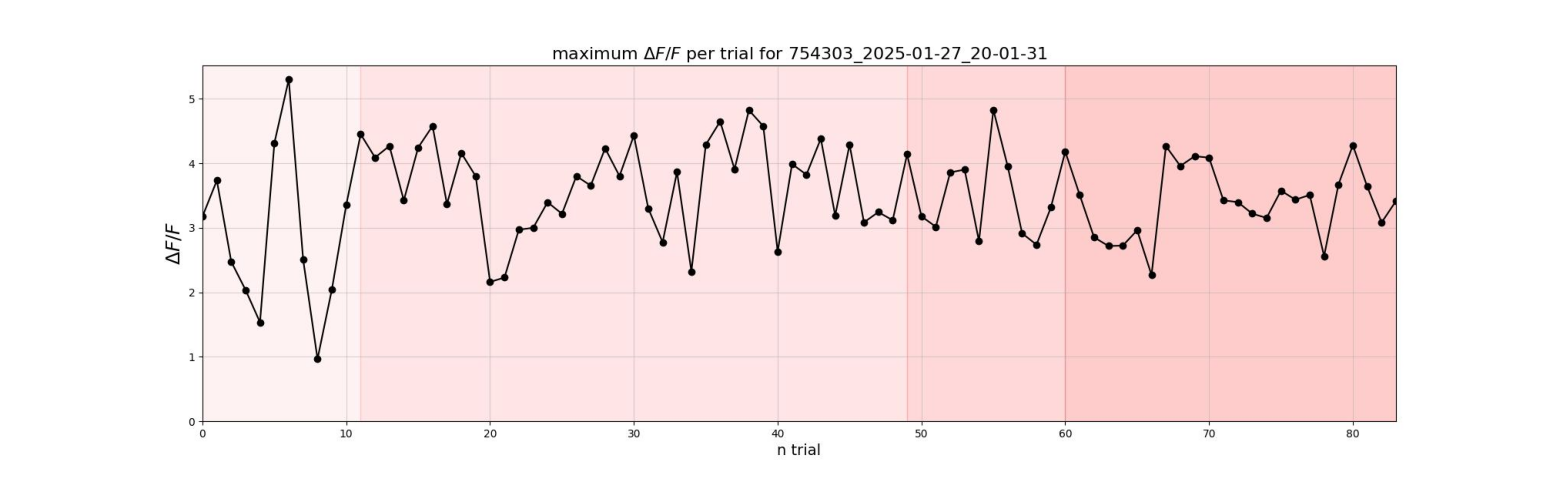

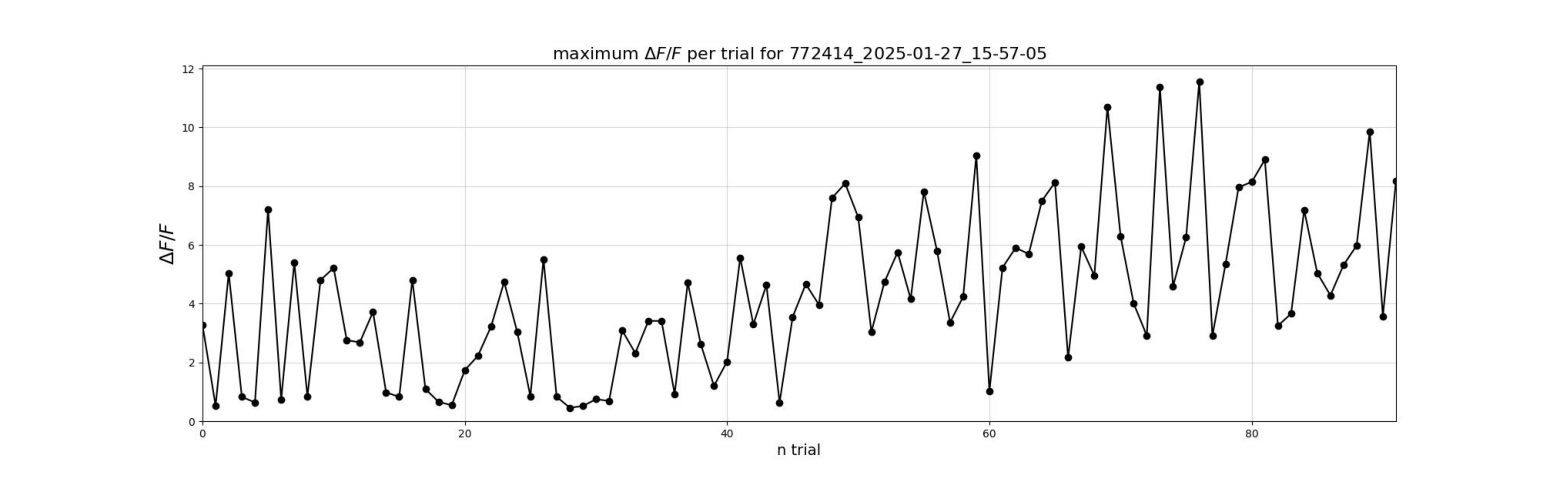

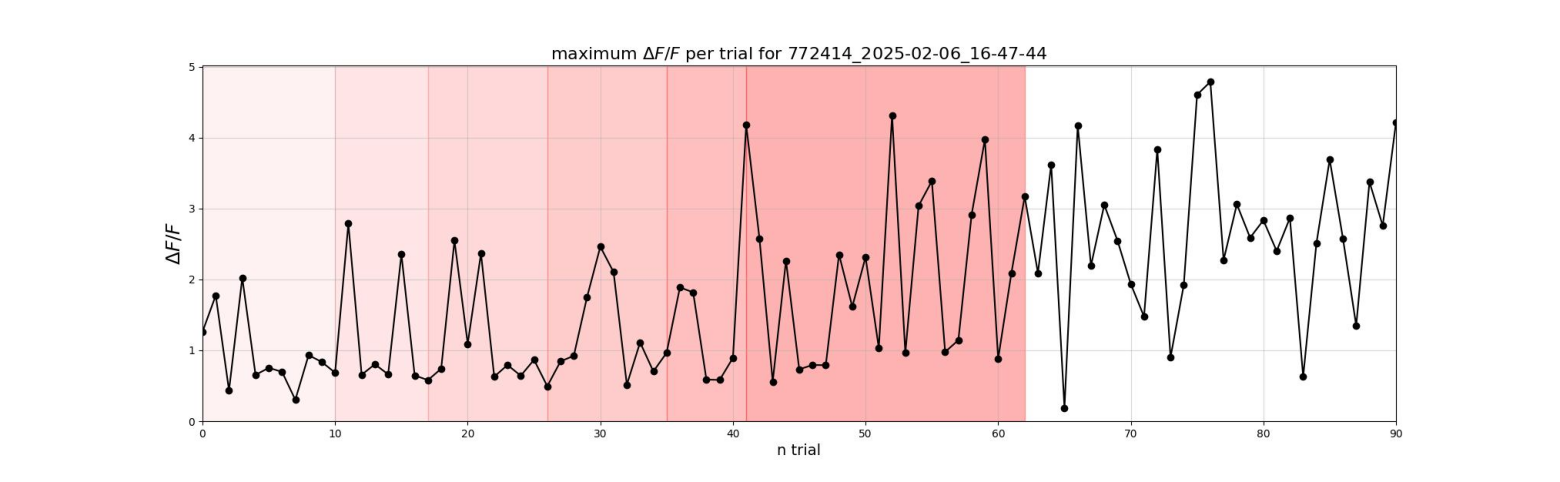

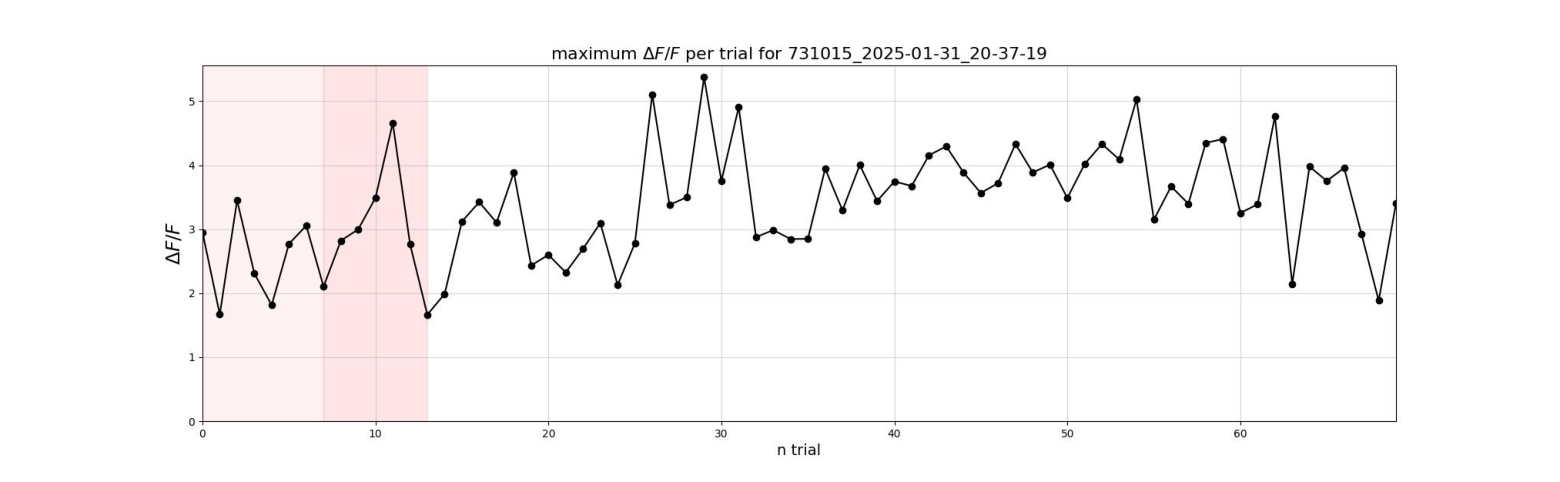

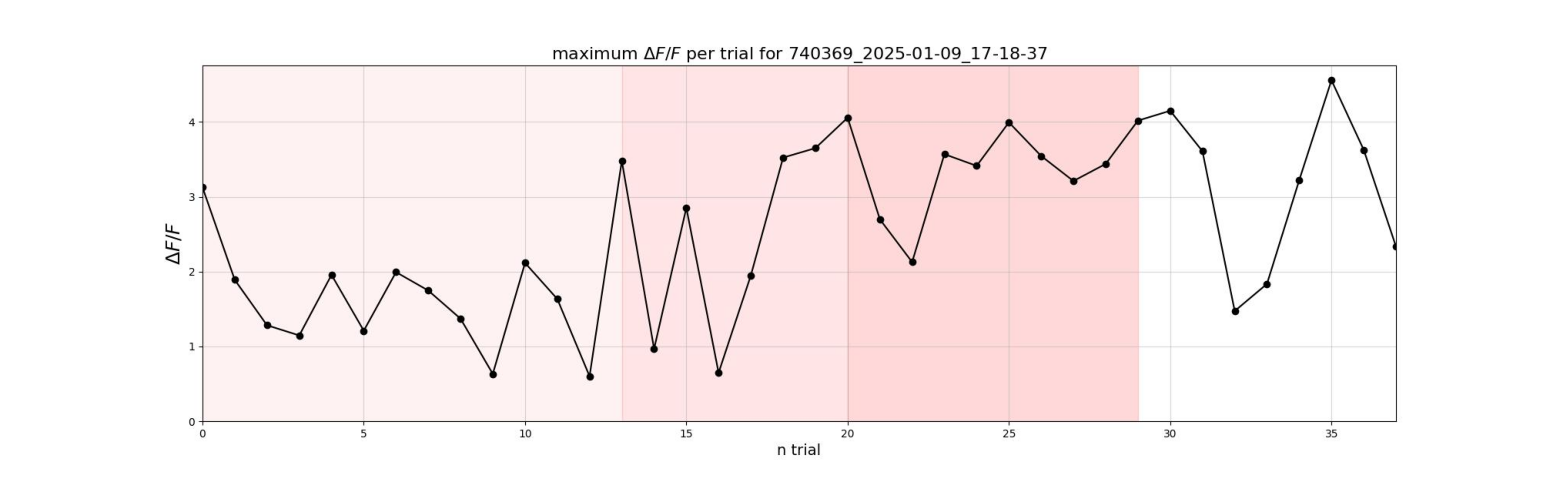

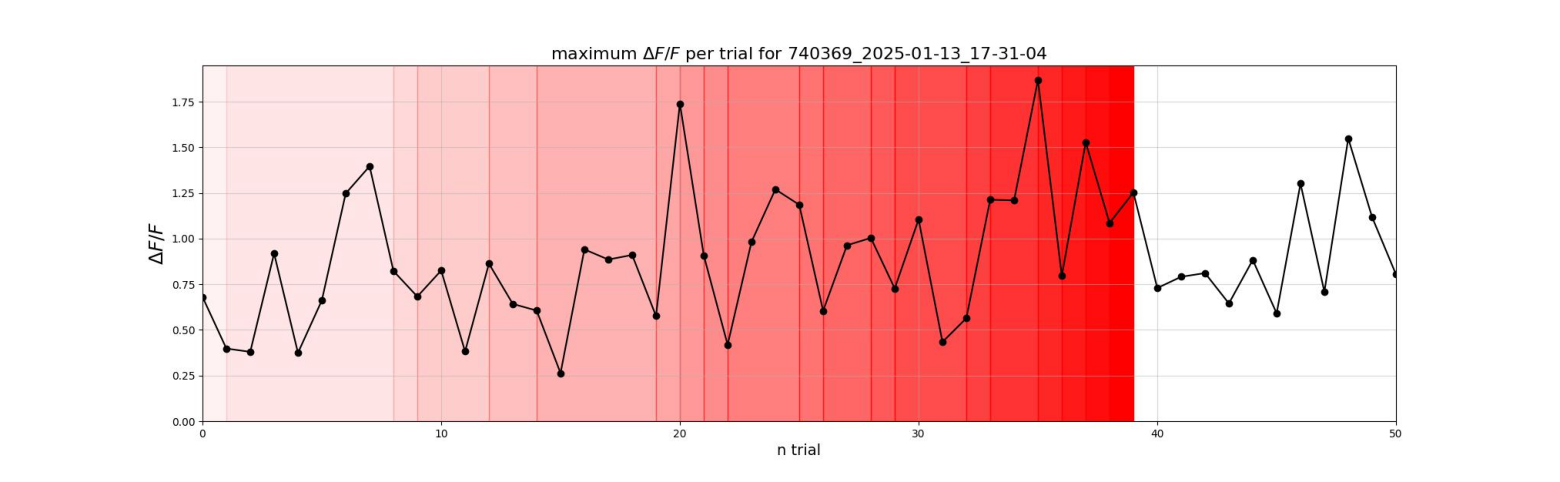

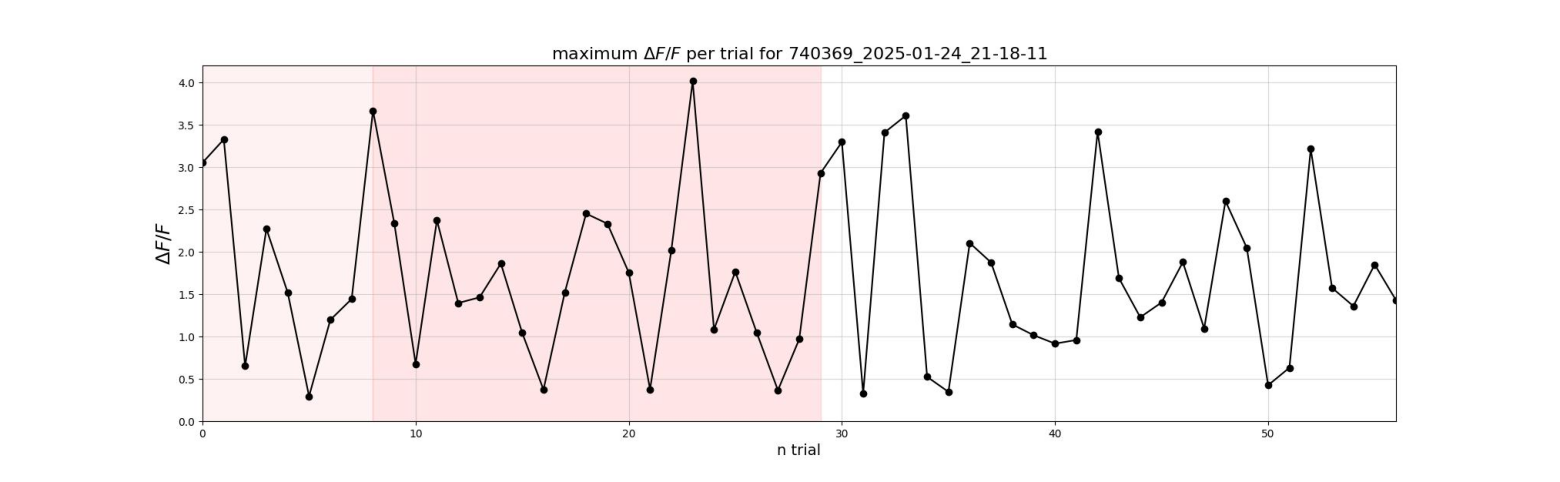

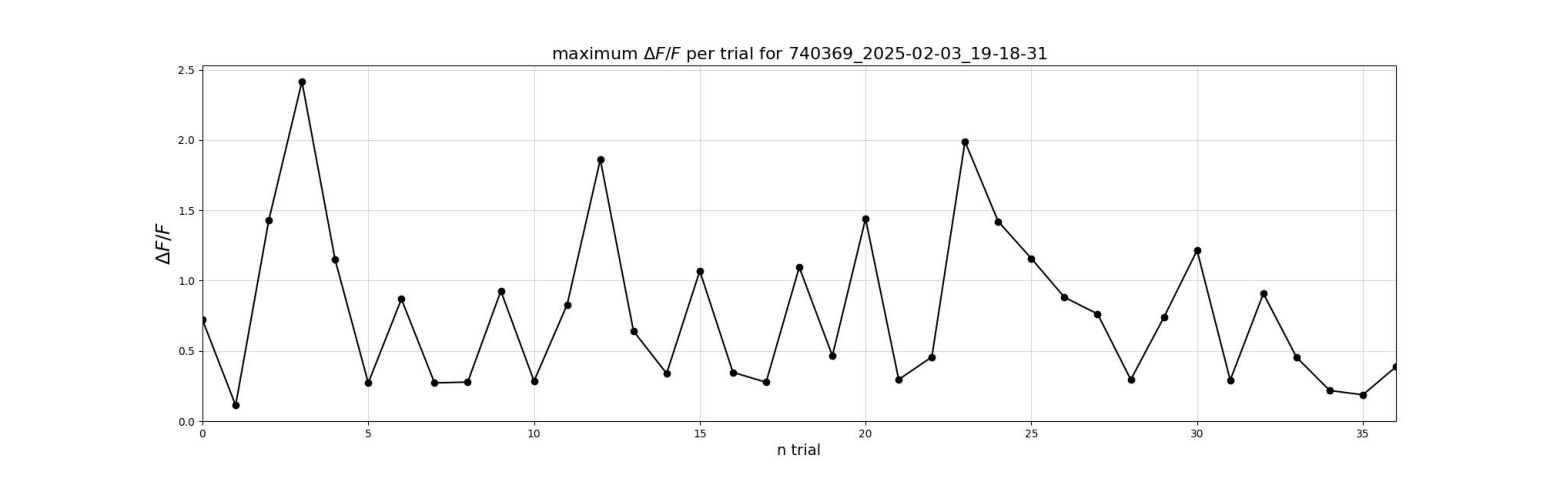

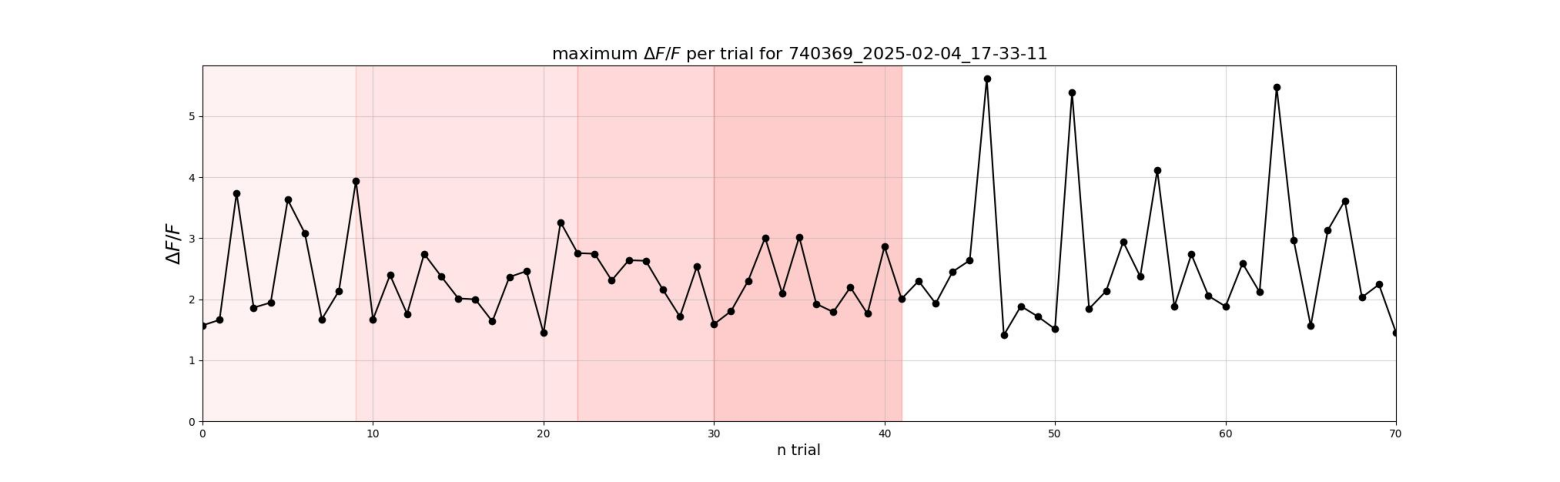

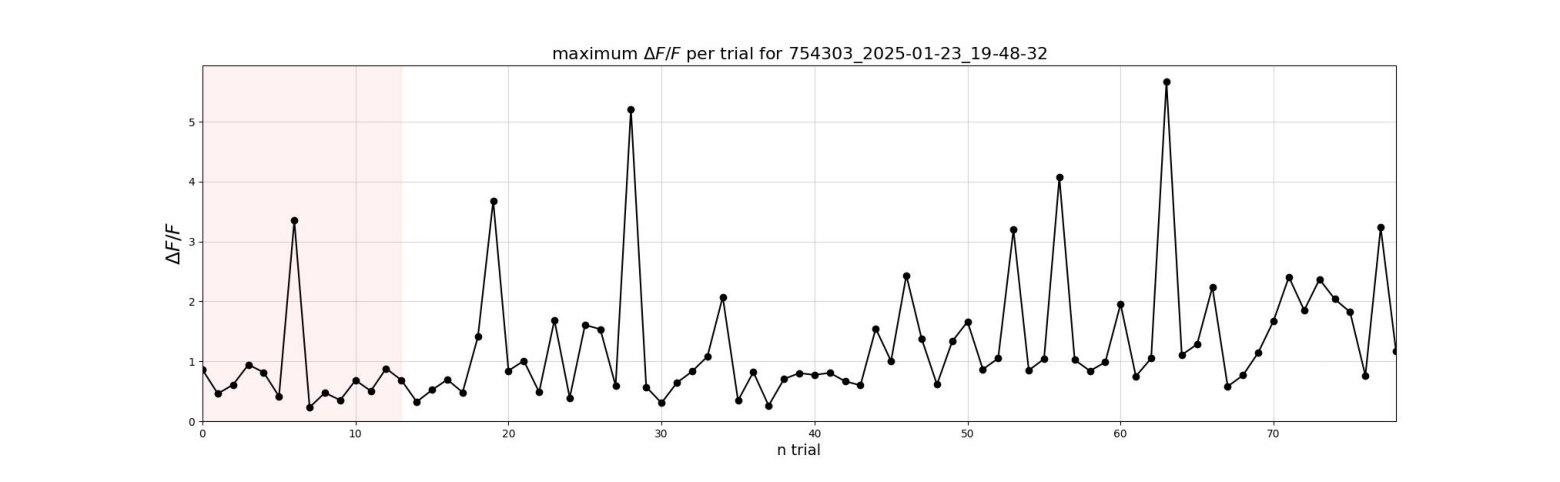

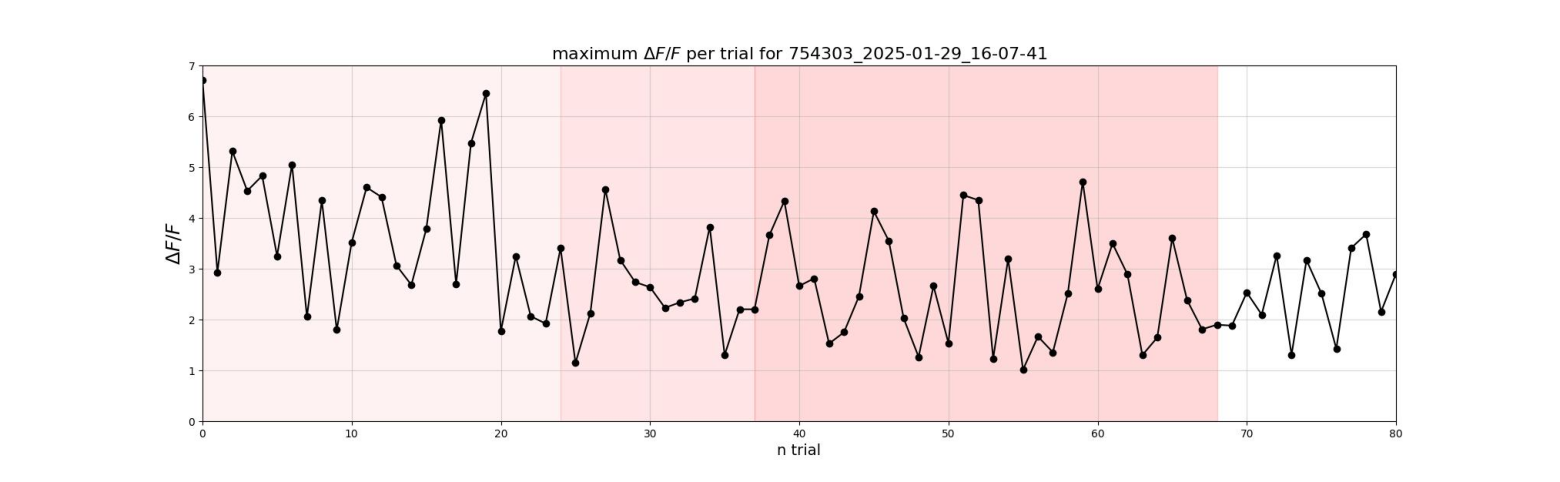

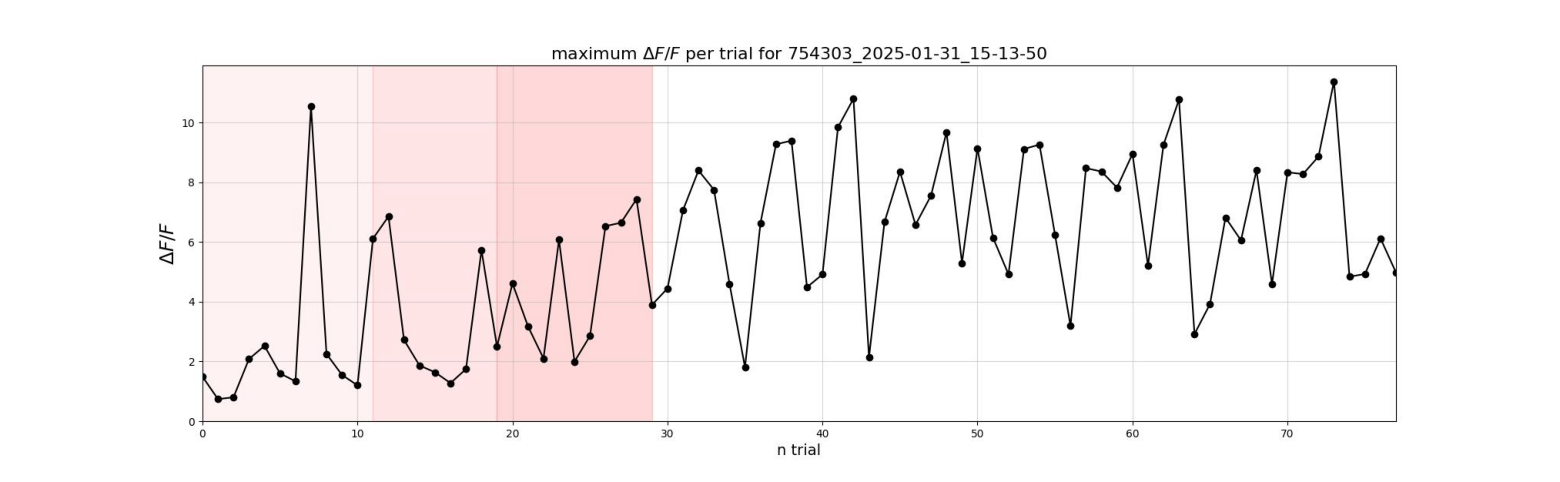

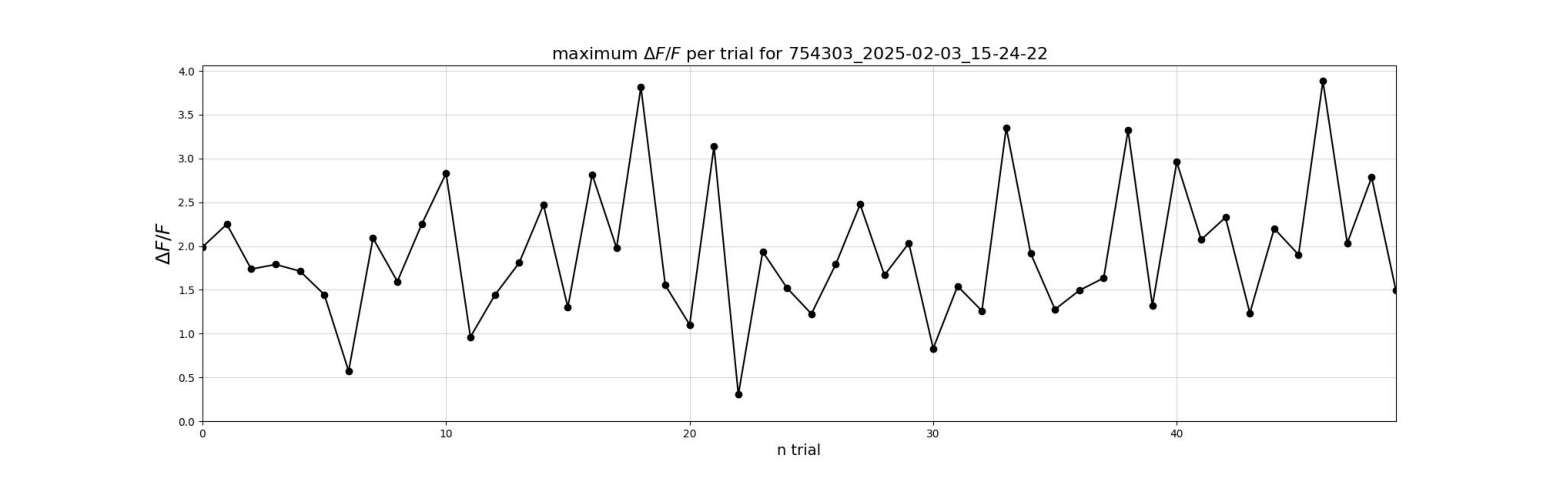

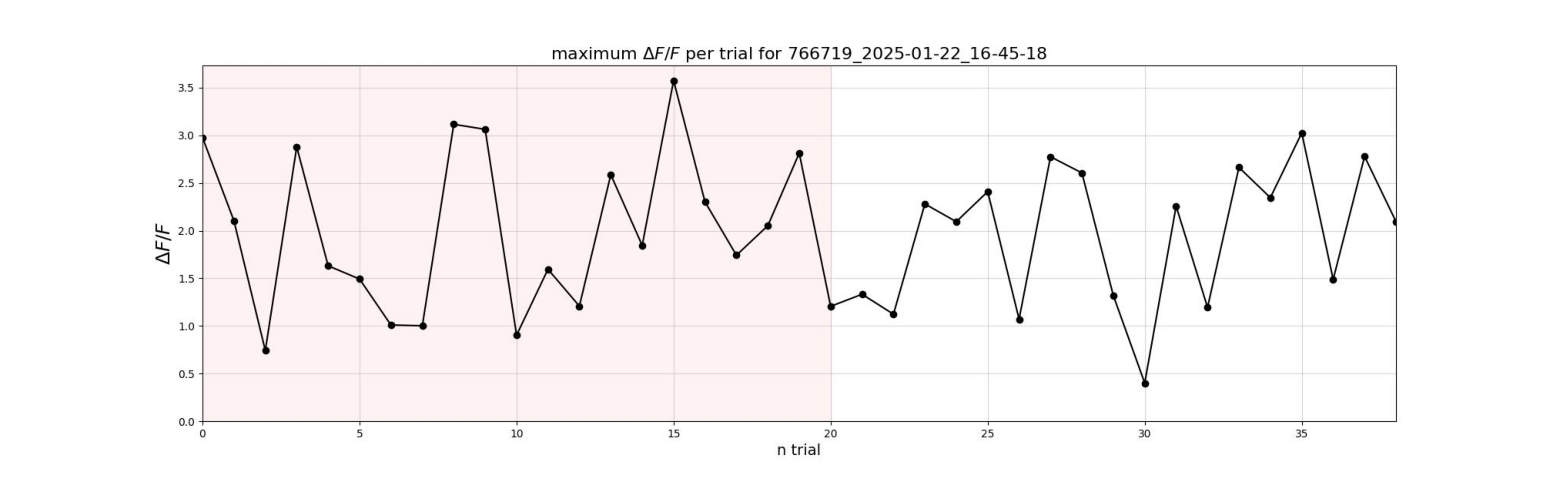

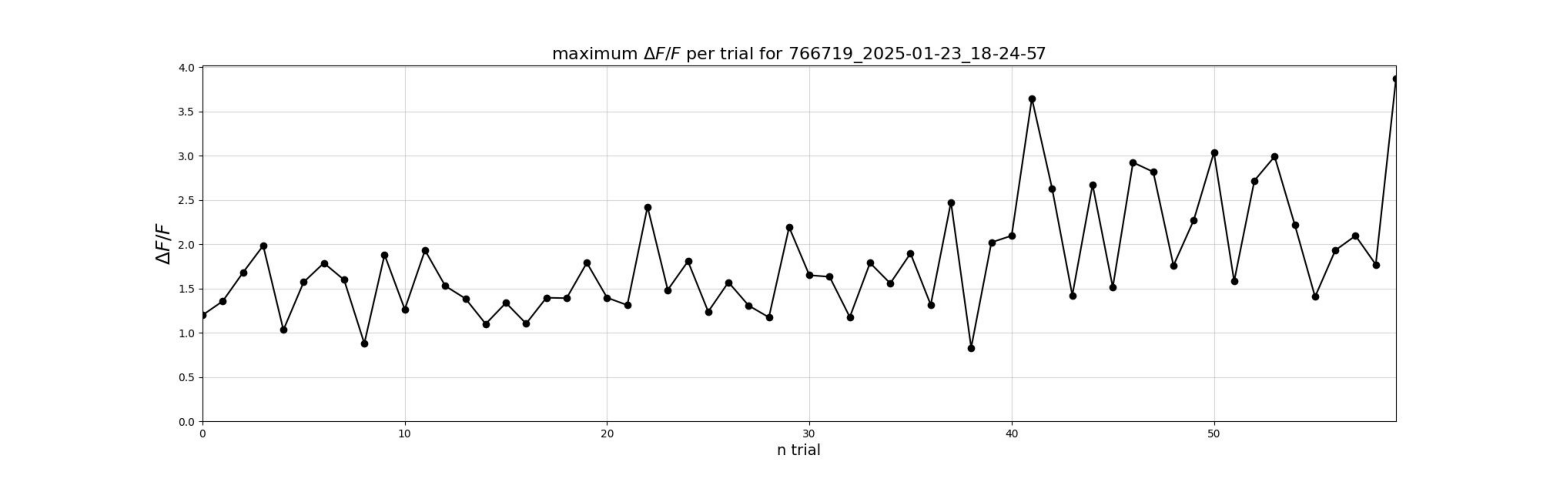

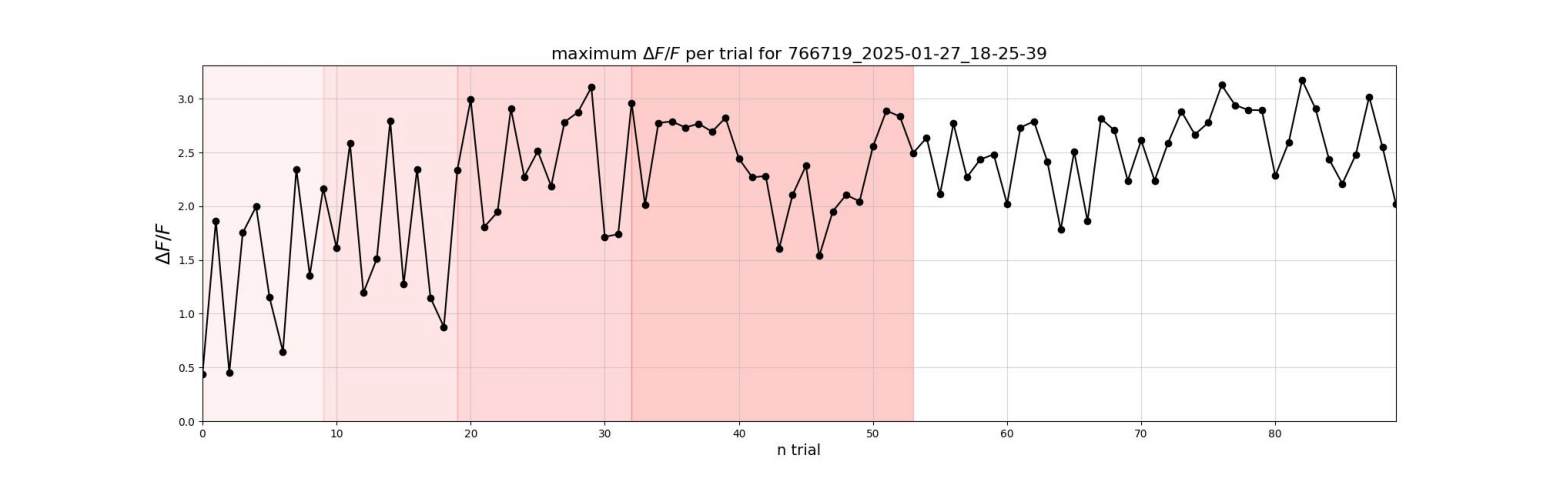

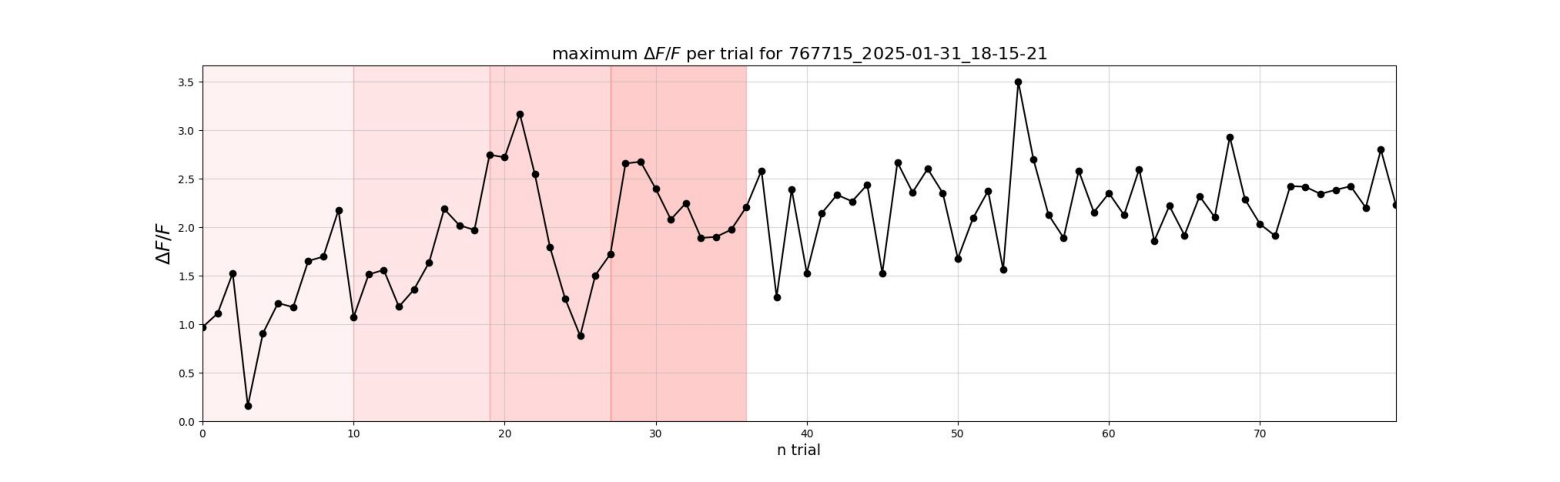

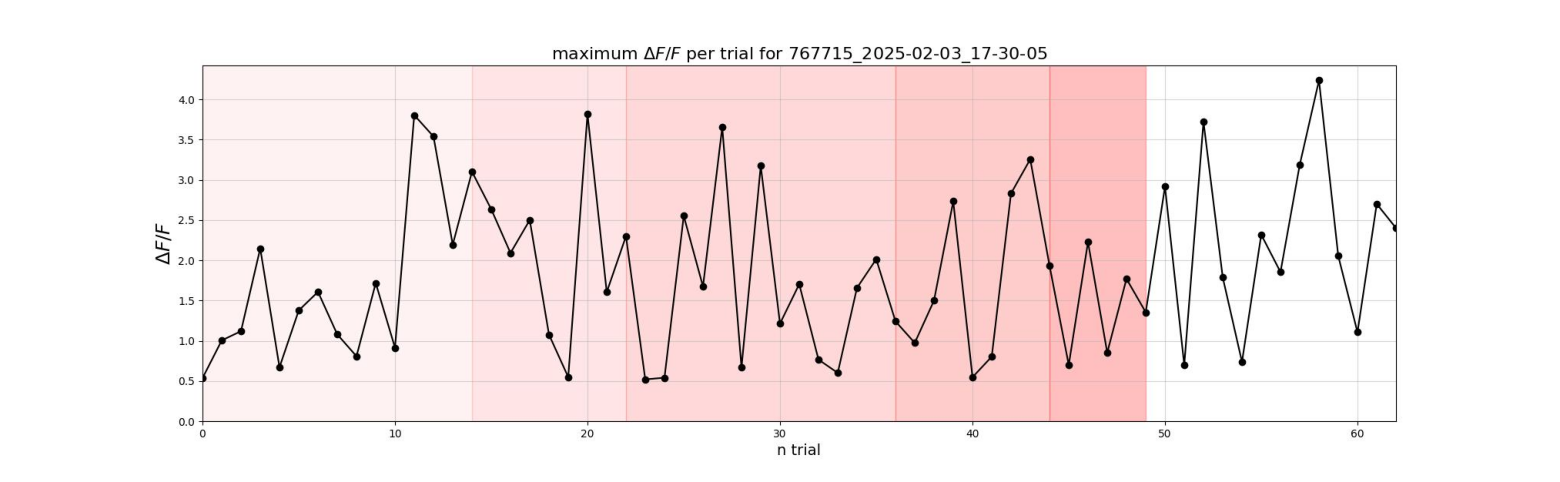

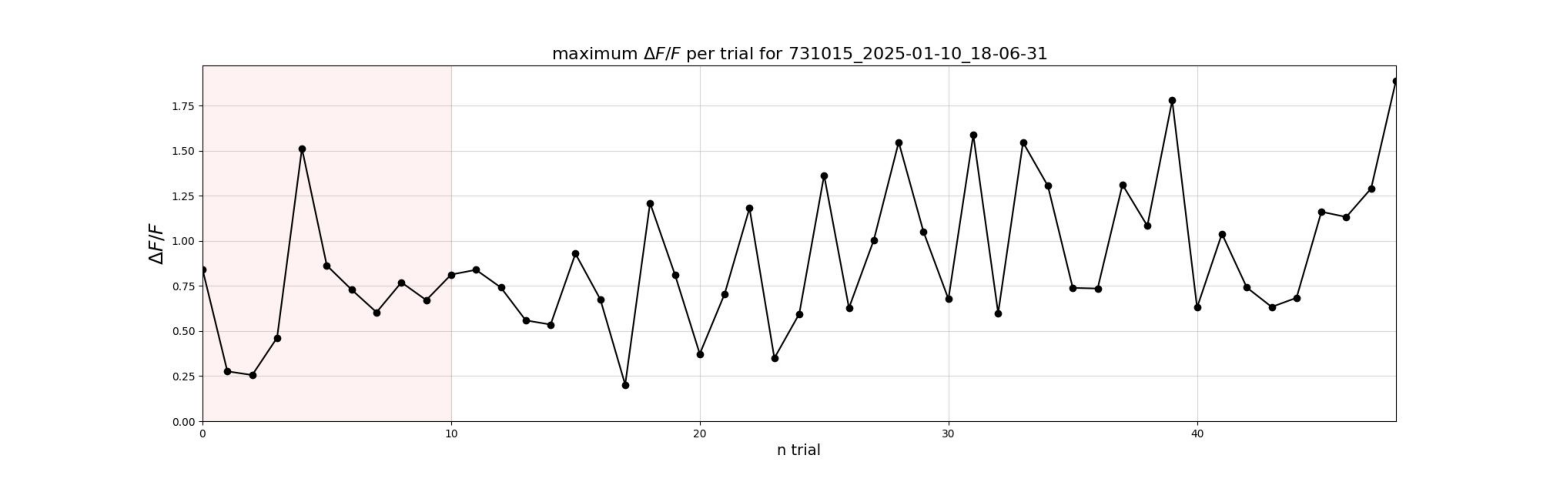

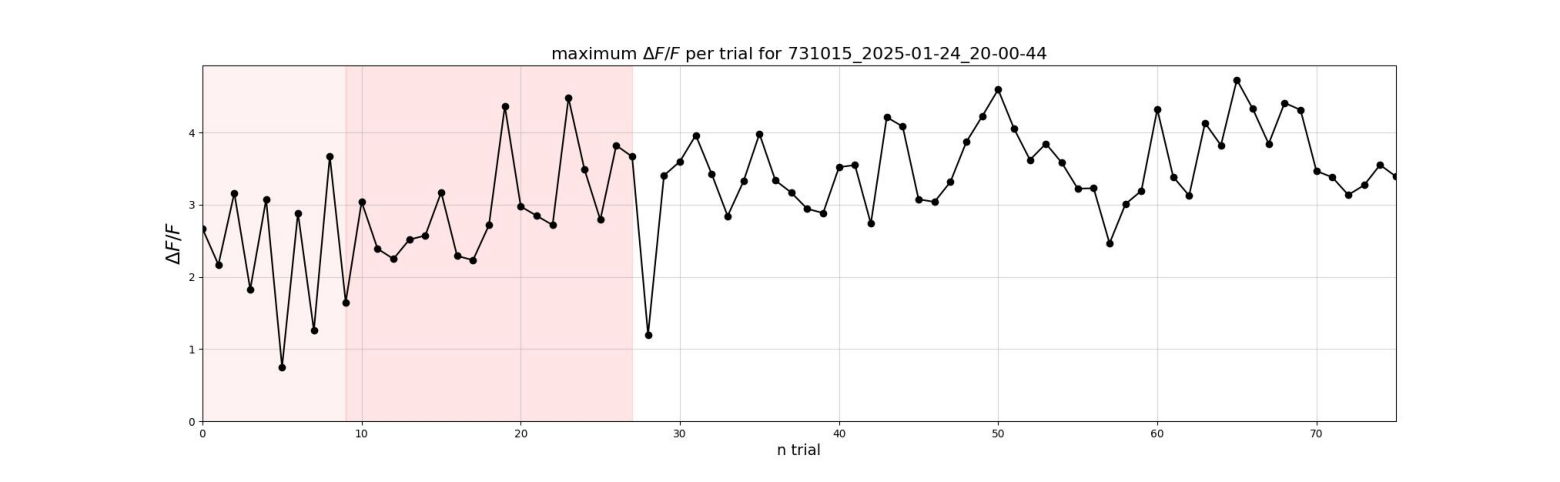

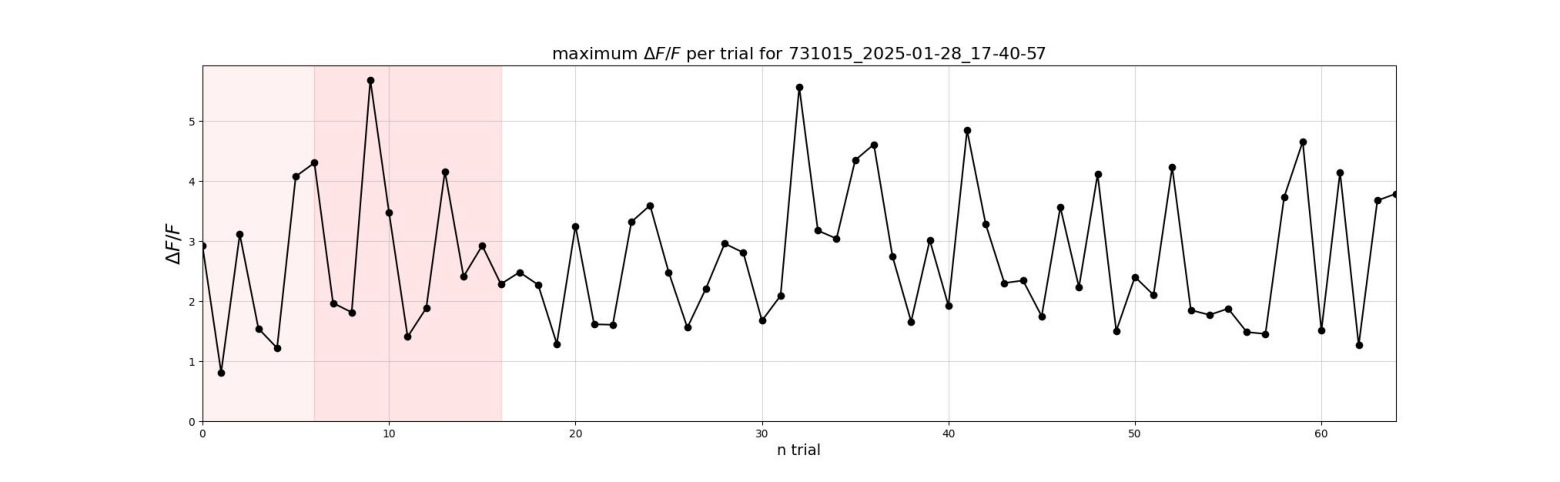

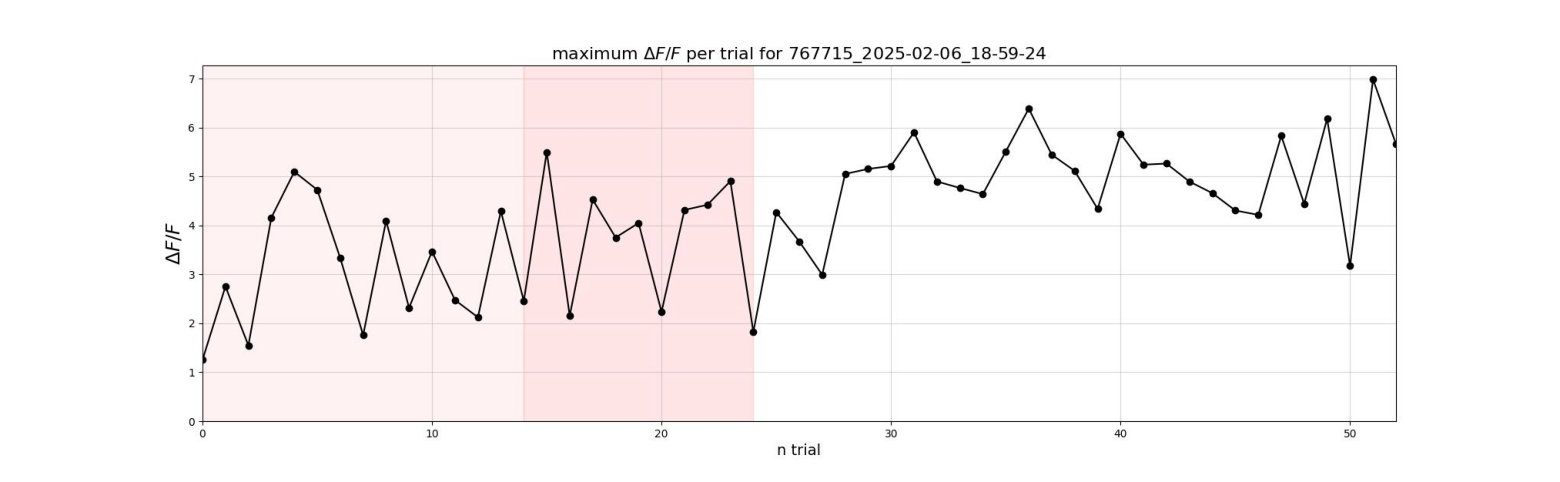

In [74]:
path = '../../figs/max_dff_per_trial'
for i in os.listdir(path):
    if i.startswith('s'):
        plt.subplots(figsize=(20, 6))
        plt.imshow(plt.imread(os.path.join(path, i)))
        plt.axis('off')
        plt.show()
        plt.close()

In [30]:
data['bci_trials'] = processing.correct_bci_trials(data['bci_trials'])
data['bci_trials'] = processing.get_valid_bci_trials(data['bci_trials'])
epoch_data = processing.get_bci_epoch_data(data)
valid_rois, cn_index = processing.filter_somas(data)
dff_bci = processing.get_valid_bci_traces(epoch_data['dff_bci'], valid_rois)

dff_smooth = processing.smooth_dff(dff_bci)

dff_by_trial = processing.get_dff_by_trial(dff_smooth, data, epoch_data)

new_index = convert_roi_index(cn_index, valid_rois)
max_dff = np.nanmean(dff_by_trial, axis=2)
cn_max = max_dff[new_index, :]

index_change_thresh = np.insert(np.where(np.insert(np.diff(data['thresholds']['high']), 0, 0,)), 0, 0)
index_change_thresh = np.append(index_change_thresh, len(data['bci_trials']))


CN: [12]


In [32]:
max_dff = np.nanmax(dff_by_trial, axis=2)
cn_max = max_dff[new_index, :]
mean_dff = np.nanmean(dff_by_trial, axis=2)
cn_mean = mean_dff[new_index, :]

In [43]:
from scipy.integrate import trapezoid

In [ ]:
# select mouse, session
mouse = 772414
mouse_md = metadata[metadata['subject_id'] == mouse].sort_values(by='session_number')
sesh = mouse_md['name'].values[-1]
print(f'mouse: {mouse}')
print(f'session: {sesh}') 

mouse: 772414
session: single-plane-ophys_772414_2025-02-10_11-15-26_processed_2025-08-04_23-06-21
